In [ ]:
# Recommendation engine with gui using python and ml
# gui for neural network and decision tree


In [1]:
import numpy as np
import pandas as pd
ratings_data = pd.read_csv("ML REC engine/ratings.csv")
print(ratings_data.head())
movie_names = pd.read_csv("ML REC engine/movies.csv")
print(movie_names.head())
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.groupby('title')['rating'].mean().head()



   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [2]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()
# this can be misleading  a ,ovie with 1 user giving 5 rating will reach top

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [3]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [11]:
# both average rating value and no of ratings are important factors
ratings_mean_count=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts']=pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

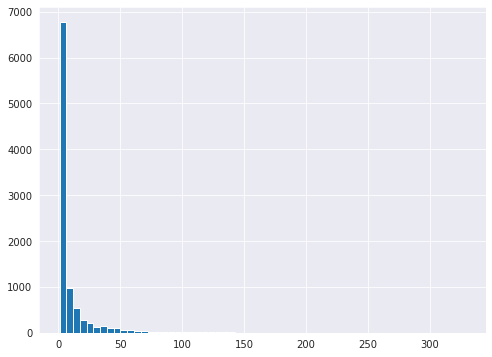

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=60)

<AxesSubplot:>

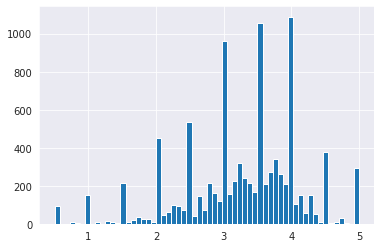

In [27]:
ratings_mean_count['rating'].hist(bins=60)

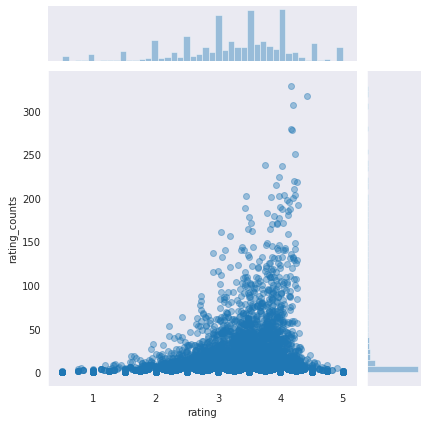

In [28]:
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [30]:
# finding similarity between movies
print(movie_data.head())
user_movie_rating=movie_data.pivot_table(index='userId',columns='title',values='rating')
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
# basically flipped the table 
user_movie_rating.head()

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#finding user rating of one movie
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']
print(forrest_gump_ratings)

# retrive the correlation between user ratings for forest gump  
# using corrwith()

movies_like_forest_gump=user_movie_rating.corrwith(forrest_gump_ratings)
corr_forrest_gump=pd.DataFrame(movies_like_forest_gump,columns=['correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head(50)
corr_forrest_gump.sort_values('correlation',ascending=False).head(10)

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    4.0
607    NaN
608    3.0
609    4.0
610    3.0
Name: Forrest Gump (1994), Length: 610, dtype: float64


/home/victor/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/victor/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [50]:
# From the output you can see that the movies that have high correlation with "Forrest
# Gump (1994)" are not very well known. 

# This shows that correlation alone is not a good metric for similarity because
# there can be a user who watched '"Forest Gump  (1994)" and only one other movie 
# and rated both of them as 5.

# A solution to this problem is to retrieve only those correlated movies that have at least
# more than 50 ratings. To do so, will add the rating_counts column from the
# rating_mean_count dataframe to our corr_forrest_gump dataframe.

corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()



,correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [56]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('correlation', ascending=False).head()

,correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52


In [60]:
# boiling it down 
import numpy as np
import pandas as pd

raitingfile_loc="ML REC engine/ratings.csv"
moviefile_loc="ML REC engine/movies.csv"

ratings_data = pd.read_csv(raitingfile_loc)
movie_names = pd.read_csv(moviefile_loc)
movie_data = pd.merge(ratings_data, movie_names, on='movieId')
ratings_mean_count=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts']=pd.DataFrame(movie_data.groupby('title')['rating'].count())
user_movie_rating=movie_data.pivot_table(index='userId',columns='title',values='rating')


# movie specific 
#finding user rating of one movie
inputname='Forrest Gump (1994)'
raiting_count=50

input_movie_ratings = user_movie_rating['Forrest Gump (1994)']
movieslike_input_movie=user_movie_rating.corrwith(input_movie_ratings)
corr_input_movie=pd.DataFrame(movieslike_input_movie,columns=['correlation'])
corr_input_movie.dropna(inplace=True)
corr_input_movie = corr_input_movie.join(ratings_mean_count['rating_counts'])
corr_input_movie[corr_input_movie ['rating_counts']>raiting_count].sort_values('correlation', ascending=False).head()

/home/victor/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/victor/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
